In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import matplotlib.patches as mpatches
import seaborn as sb
from scipy.stats import gaussian_kde

In [3]:
# Load the crimerates
crime_rate_df = pd.read_csv("crimerates-by-state-2005.csv")
crime_rate_df.head()

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7,295753151
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221


# Scatterplot

In [4]:
# U.S crime rates of each states 
states_crime = crime_rate_df[crime_rate_df['state'] != 'United States']
states_crime.head()


,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221
5,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,35795255


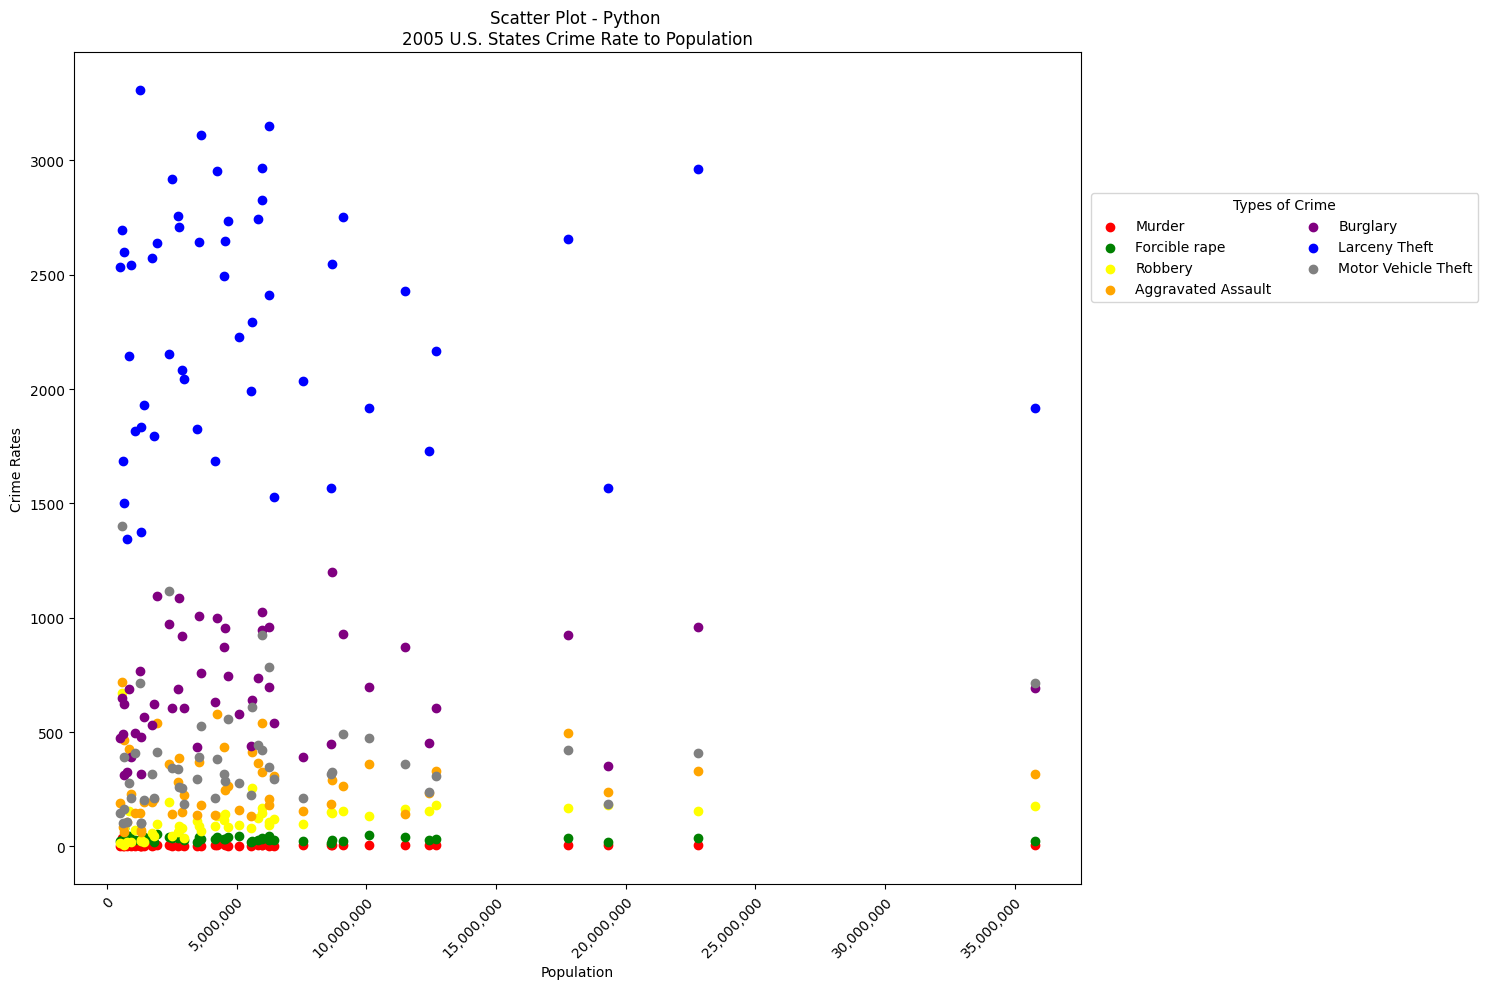

In [5]:
# display the state crime rate based on population of each estates 
# Use scatterplot

fig, ax = plt.subplots(figsize = (15, 10))

plt.scatter(states_crime['population'], states_crime['murder'], c = 'red', label = 'Murder')
plt.scatter(states_crime['population'], states_crime['forcible_rape'], c = 'green', label = 'Forcible rape')
plt.scatter(states_crime['population'], states_crime['robbery'], c = 'yellow', label = 'Robbery')
plt.scatter(states_crime['population'], states_crime['aggravated_assault'], c = 'orange', label = 'Aggravated Assault')
plt.scatter(states_crime['population'], states_crime['burglary'], c = 'purple', label = 'Burglary')
plt.scatter(states_crime['population'], states_crime['larceny_theft'], c = 'blue', label = 'Larceny Theft')
plt.scatter(states_crime['population'], states_crime['motor_vehicle_theft'], c = 'gray', label = 'Motor Vehicle Theft')

ax.get_xaxis().set_major_formatter(
    tick.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel("Population")
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor')
plt.ylabel("Crime Rates")
plt.title("Scatter Plot - Python \n2005 U.S. States Crime Rate to Population")

ax.legend(loc=(1.01, 0.7), ncol = 2, title = 'Types of Crime')
plt.tight_layout()

plt.show()


# Bubble Chart 

In [6]:
# U.S crime rate 
us_crime = crime_rate_df[crime_rate_df['state'] == 'United States']
us_crime.head()

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7,295753151


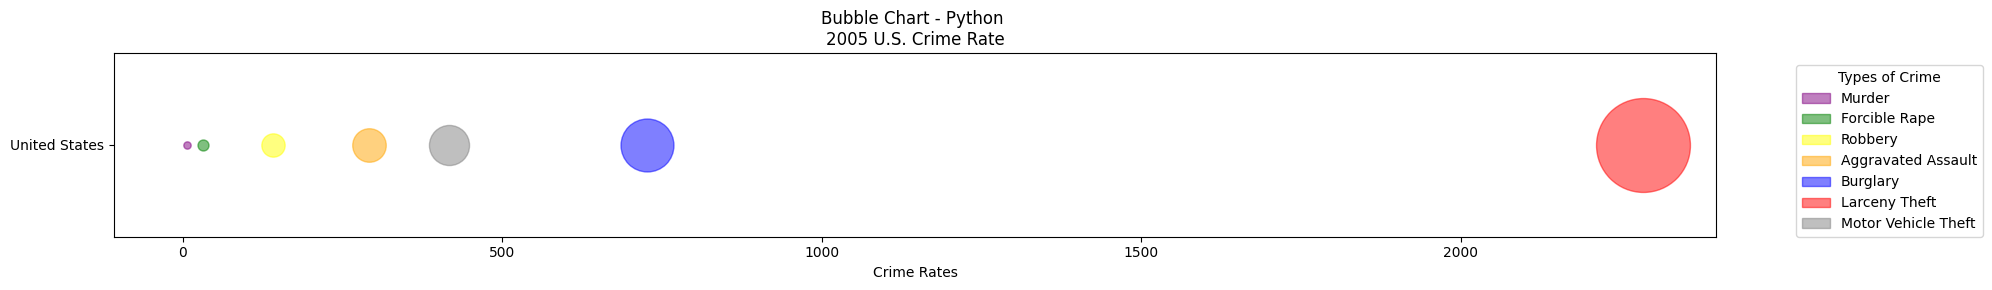

In [7]:

fig, ax = plt.subplots(figsize = (20, 3))

plt.scatter(us_crime['murder'], us_crime['state'],
            c = 'purple', label = 'Murder', s = us_crime['murder'] * 5,
           alpha = 0.5)
plt.scatter(us_crime['forcible_rape'], us_crime['state'], 
            c = 'green', label = 'Forcible rape', s = us_crime['forcible_rape'] * 2,
           alpha = 0.5)
plt.scatter(us_crime['robbery'], us_crime['state'], 
            c = 'yellow', label = 'Robbery', s = us_crime['robbery'] * 2,
           alpha = 0.5)
plt.scatter(us_crime['aggravated_assault'], us_crime['state'], 
            c = 'orange', label = 'Aggravated Assault', s = us_crime['aggravated_assault'] * 2,
           alpha = 0.5)
plt.scatter(us_crime['burglary'], us_crime['state'], 
            c = 'blue', label = 'Burglary', s = us_crime['burglary'] * 2,
           alpha = 0.5)
plt.scatter(us_crime['larceny_theft'], us_crime['state'], 
            c = 'red', label = 'Larceny Theft', s = us_crime['larceny_theft'] * 2,
           alpha = 0.5)
plt.scatter(us_crime['motor_vehicle_theft'], us_crime['state'], 
            c = 'gray', label = 'Motor Vehicle Theft', s = us_crime['motor_vehicle_theft'] * 2,
           alpha = 0.5)

plt.xlabel("Crime Rates")
plt.title("Bubble Chart - Python \n2005 U.S. Crime Rate")

crimes_list = ["Murder", "Forcible Rape", "Robbery", "Aggravated Assault", "Burglary",
              "Larceny Theft", "Motor Vehicle Theft"]
color_list = ["purple", "green", "yellow", "orange", "blue", "red", "gray"]
legend_list = []
for i in range(0, len(crimes_list)):
    legend_list.append(mpatches.Patch(color = color_list[i],
                            alpha = 0.5,
                            label = crimes_list[i]))
ax.legend(handles = legend_list, loc = (1.05, 0), title = 'Types of Crime')
           
plt.tight_layout()

plt.show()



# density Plot

In [8]:
# Slice Columns in pandas using reindex
states_crime_df = states_crime.reindex(columns = ['state', 'burglary'])
states_crime_df.head()

,state,burglary
1,Alabama,953.8
2,Alaska,622.5
3,Arizona,948.4
4,Arkansas,1084.6
5,California,693.3


In [9]:
# Slice Columns in pandas using reindex
larceny_theft_df = states_crime.reindex(columns = ['state', 'larceny_theft'])
larceny_theft_df.head()

,state,larceny_theft
1,Alabama,2650.0
2,Alaska,2599.1
3,Arizona,2965.2
4,Arkansas,2711.2
5,California,1916.5


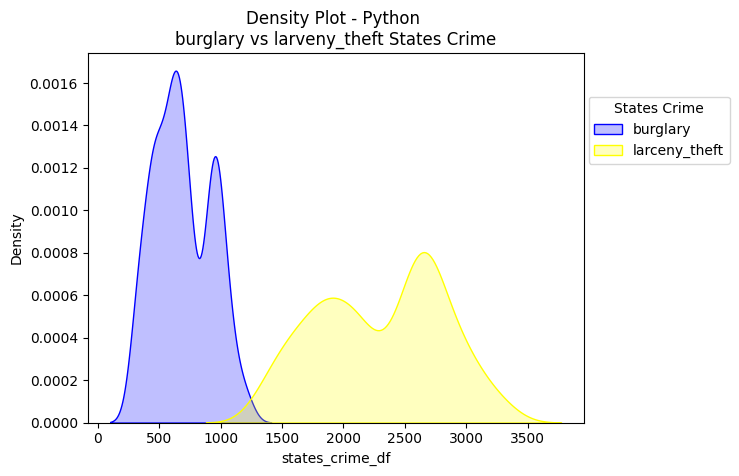

In [13]:

density = gaussian_kde(states_crime_df['burglary'])

fig, ax = plt.subplots()

sb.kdeplot(states_crime_df['burglary'] , bw_method = 0.3 , fill = True, color = 'blue', label = 'burglary')
sb.kdeplot(larceny_theft_df['larceny_theft'] , bw_method = 0.3 , fill = True, color = 'yellow', label = 'larceny_theft')

plt.title('Density Plot - Python \nburglary vs larveny_theft States Crime')
plt.xlabel('states_crime_df')

ax.legend(loc=(1.01, 0.7), ncol = 1, title = 'States Crime')

plt.show()